In [1]:
# importing necessary libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
# Reading Dataset

In [31]:
df=pd.read_csv('D:\\dsa\\wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
# The shape of dataset

In [33]:
df.shape

(178, 13)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [35]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [36]:
# Distribution

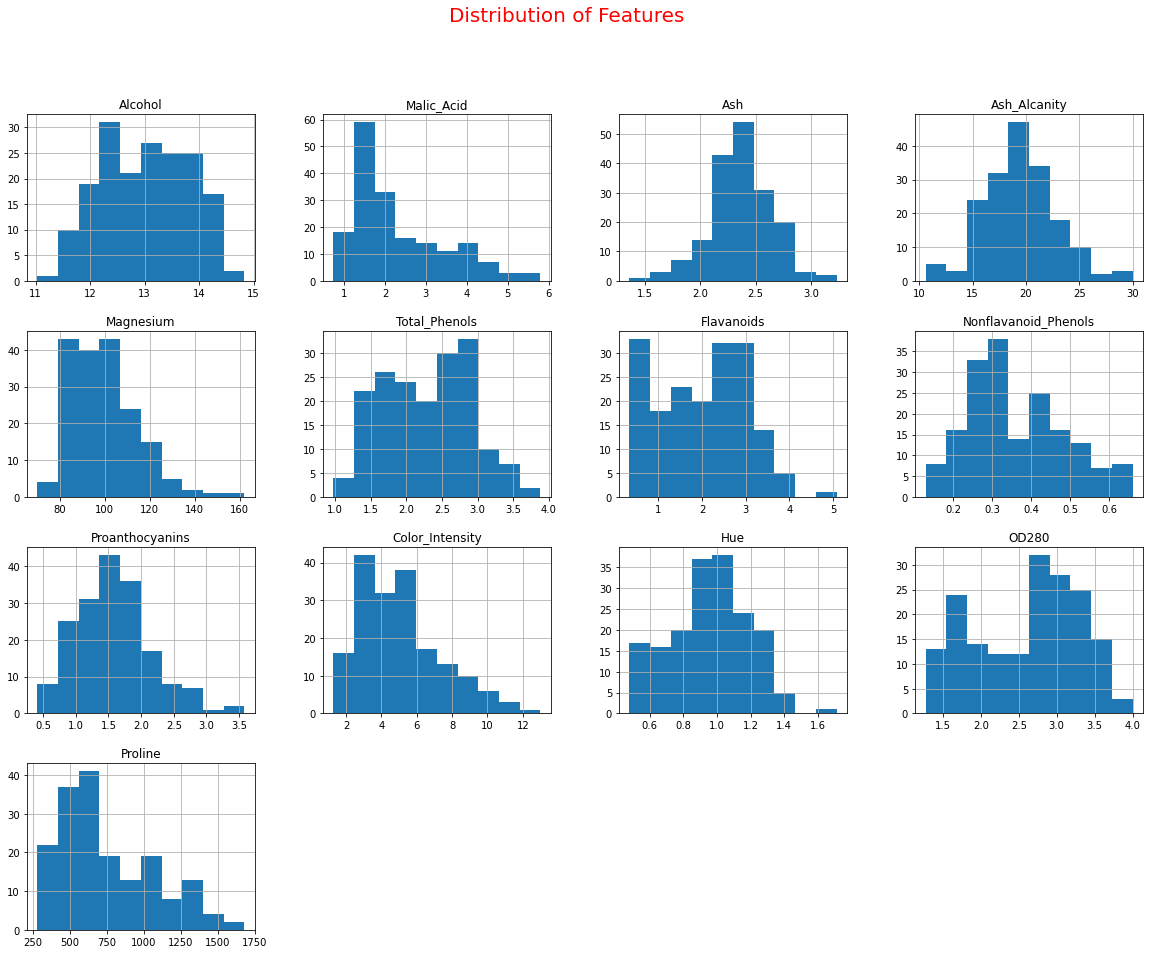

In [19]:
num_fea = df.select_dtypes(exclude='object')
num_fea.hist(figsize=(20,15))
plt.suptitle('Distribution of Features', color='red', fontsize=20)
plt.show()

In [37]:
# Correlation of Features

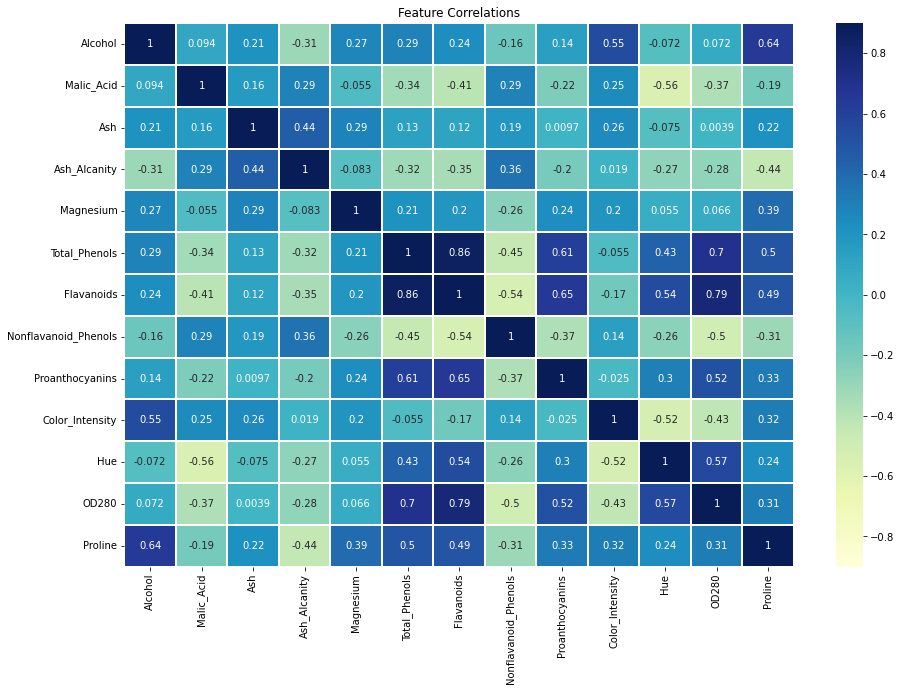

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), vmin=-0.9, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.title('Feature Correlations')
plt.show()

In [39]:
# Preprocessing

In [40]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [41]:
# Checking for outliers

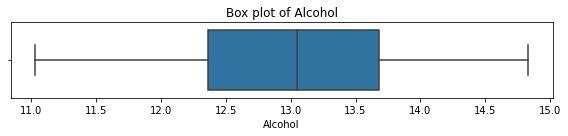

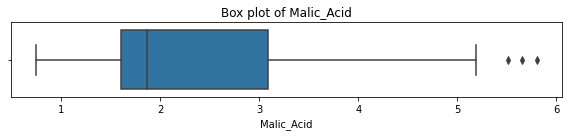

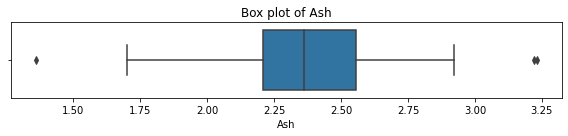

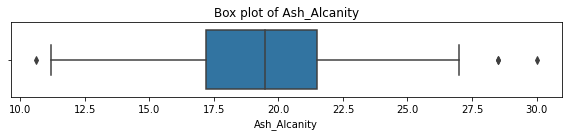

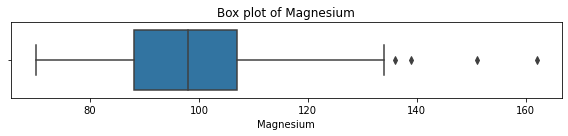

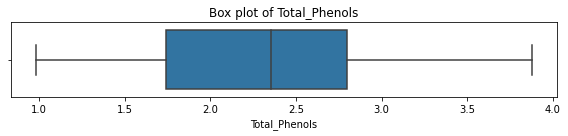

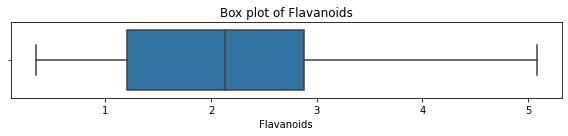

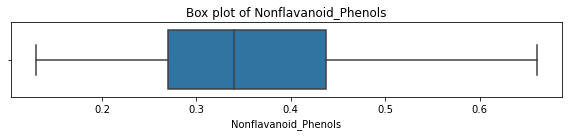

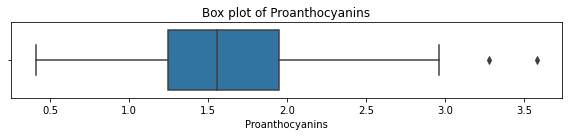

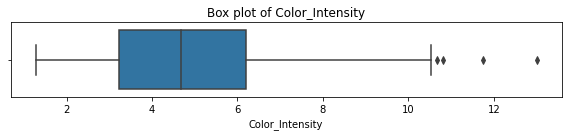

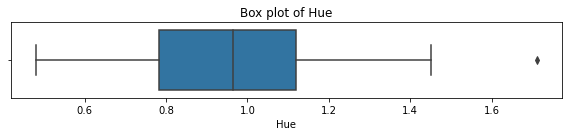

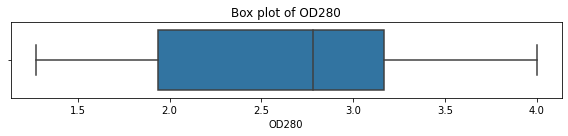

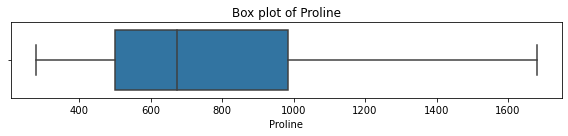

In [42]:
for columns in df.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[columns])
    plt.title('Box plot of {}'.format(columns))
    plt.tight_layout()
    plt.show()

In [44]:
scaler = StandardScaler()
df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]=scaler.fit_transform(df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']])

In [45]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= df
x = sc.fit_transform(x)

In [73]:
# PCA

In [74]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
df_std_pca = pca.transform(X)
print('Total number of principal componemnts: ',pca.n_components_)

Total number of principal componemnts:  14


In [75]:
#percentage variation

per_var = pca.explained_variance_ratio_*100
per_var = np.round(per_var, 1)
per_var

array([39.4, 17.9, 10.3,  6.6,  6.1,  4.6,  4. ,  2.5,  2.1,  1.9,  1.6,
        1.3,  1. ,  0.7])

In [76]:
#Plotting percentage of explained variance with principal component

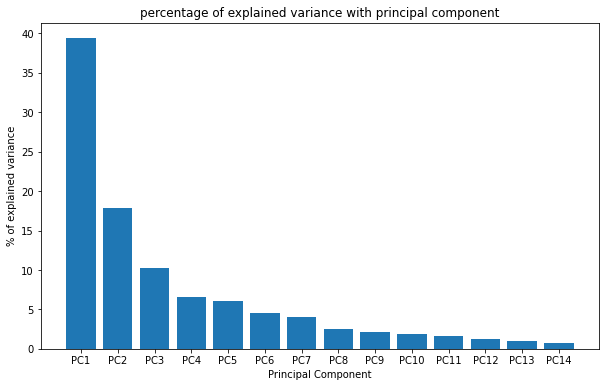

In [77]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(10,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of explained variance')
plt.xlabel('Principal Component')
plt.title('percentage of explained variance with principal component')
plt.show()

In [78]:
# Cumulative variance explained by each PC

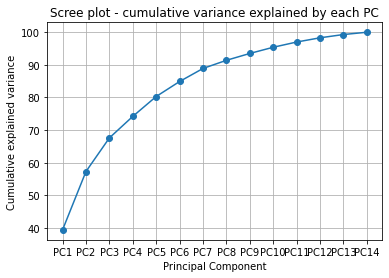

In [79]:
cum_var = np.cumsum(per_var)
plt.plot(labels, cum_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative explained variance')
plt.title('Scree plot - cumulative variance explained by each PC')
plt.grid()
plt.show()

In [69]:
# Making clusters

In [70]:
# 1. K Means

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans

KMeans(n_clusters=3)

In [82]:
pred = kmeans.fit_predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [83]:
df['K_means_Cluster'] = pred
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans,K_means_Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,0


In [84]:
df1 = df[df['K_means_Cluster']==0]
df2 = df[df['K_means_Cluster']==1]
df3 = df[df['K_means_Cluster']==2]


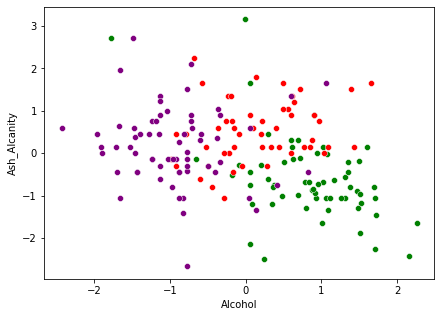

In [86]:
plt.figure(figsize=(7, 5))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df3, color='purple')
plt.xlabel('Alcohol')
plt.ylabel('Ash_Alcanity')

plt.show()


In [87]:
kmeans.cluster_centers_

array([[ 8.35232085e-01, -3.03809683e-01,  3.64706042e-01,
        -6.10191294e-01,  5.77586799e-01,  8.85237363e-01,
         9.77819557e-01, -5.62089654e-01,  5.80286581e-01,
         1.71063479e-01,  4.73983650e-01,  7.79247107e-01,
         1.12518529e+00,  4.44089210e-16],
       [ 1.64907465e-01,  8.71547061e-01,  1.86898330e-01,
         5.24367458e-01, -7.54727669e-02, -9.79330286e-01,
        -1.21524764e+00,  7.26063536e-01, -7.79706388e-01,
         9.41538738e-01, -1.16478865e+00, -1.29241163e+00,
        -4.07087958e-01,  1.00000000e+00],
       [-9.26071845e-01, -3.94041535e-01, -4.94516760e-01,
         1.70601844e-01, -4.91711853e-01, -7.59826451e-02,
         2.08125686e-02, -3.35335663e-02,  5.82655047e-02,
        -9.01914020e-01,  4.61803613e-01,  2.70764189e-01,
        -7.53846184e-01,  6.15384615e-01]])

In [88]:
# Elbow Method to Find Appropriate number of clusters

In [89]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Alcohol', 'Ash_Alcanity']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [90]:
sse

[356.00000000000006,
 202.14146130340447,
 135.6608396498823,
 106.92218491068647,
 86.68587636093692,
 74.34675420950117,
 63.22352762670893,
 54.54432510802861,
 46.88692660382857]

In [91]:
# Elbow Plot

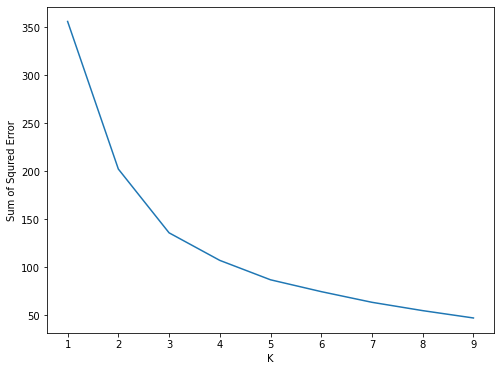

In [92]:
fig = plt.figure(figsize=(8,6))

plt.xlabel('K')
plt.ylabel('Sum of Squred Error')
plt.plot(k_rng,sse)

In [93]:
# Hierarchial Agglomerative Clustering

In [94]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [95]:
points = df[['Alcohol', 'Ash_Alcanity']]

In [96]:
# Dendrogram

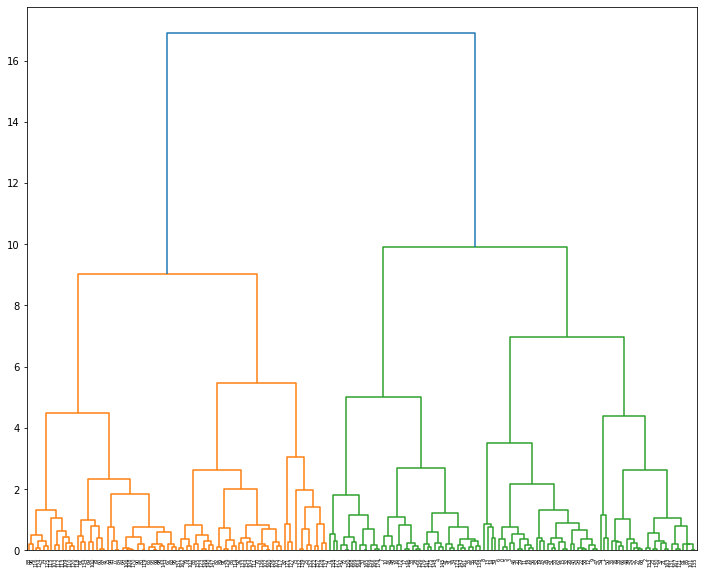

In [99]:
fig = plt.figure(figsize=(12,10))

dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

In [100]:
# Clustering

In [101]:
hc = AgglomerativeClustering(3)
hc

AgglomerativeClustering(n_clusters=3)

In [102]:
pred = hc.fit_predict(df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [103]:
df['Hierarchical_Cluster'] = pred
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans,K_means_Cluster,Hierarchical_Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,0,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,0,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,0,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,0,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,0,1


In [104]:
df1 = df[df['Hierarchical_Cluster']==0]
df2 = df[df['Hierarchical_Cluster']==1]
df3 = df[df['Hierarchical_Cluster']==2]

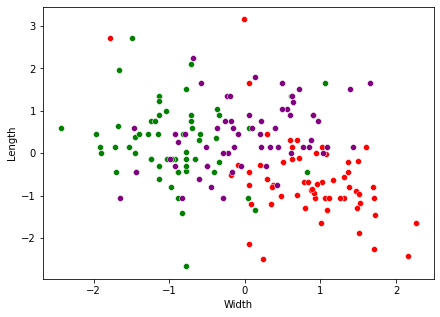

In [107]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df3, color='purple')

plt.xlabel('Width')
plt.ylabel('Length')

plt.show()

In [109]:
# Density - Based Clustering


In [110]:
from sklearn.cluster import DBSCAN

In [111]:
dbscan = DBSCAN(3)
dbscan

DBSCAN(eps=3)

In [112]:
model = dbscan.fit_predict(df)
model

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0,  0,
        1, -1,  1, -1,  0, -1,  0,  0,  0,  1, -1,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  1,
        0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [113]:
df['DBSCAN_Cluster'] = model
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,0,1,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,0,1,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,0,1,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,0,1,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,0,1,0


In [114]:
df1 = df[df['DBSCAN_Cluster']==0]
df2 = df[df['DBSCAN_Cluster']==1]
df3 = df[df['DBSCAN_Cluster']==-1]

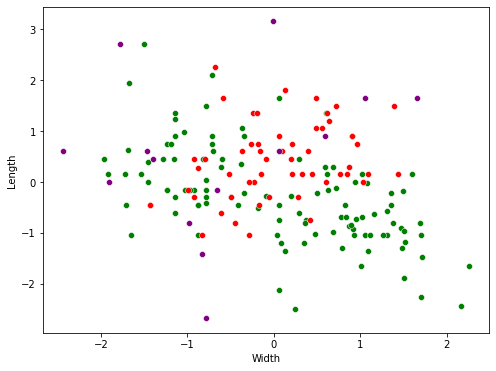

In [116]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df3, color='purple')

plt.xlabel('Width')
plt.ylabel('Length')

plt.show()

In [117]:
sb = df[['Alcohol', 'Ash_Alcanity', 'K_means_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']]
sb.head()

,Alcohol,Ash_Alcanity,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1.518613,-1.169593,0,1,0
1,0.246290,-2.490847,0,1,0
2,0.196879,-0.268738,0,1,0
3,1.691550,-0.809251,0,1,0
4,0.295700,0.451946,0,1,0


In [118]:
sb.shape

(178, 5)

In [119]:
km = sb['K_means_Cluster'].value_counts()
hc = sb['Hierarchical_Cluster'].value_counts()
db = sb['DBSCAN_Cluster'].value_counts()
db

 0    111
 1     53
-1     14
Name: DBSCAN_Cluster, dtype: int64

In [132]:
data1 = pd.DataFrame({ 'KM_Cluster' : km.index,'K_Means' : km.values}, columns=['KM_Cluster', 'K_Means'])
data1.set_index('KM_Cluster', inplace=True)
data1

,K_Means
KM_Cluster,
2,65
0,62
1,51


In [133]:
data2 = pd.DataFrame({'HC_Cluster' : hc.index,'Hierarchial' : hc.values}, columns=['HC_Cluster', 'Hierarchial'])
data2.set_index('HC_Cluster', inplace=True)
data2

,Hierarchial
HC_Cluster,
1,61
0,60
2,57


In [134]:
data3 = pd.DataFrame({'DB_Cluster': db.index,'DBSCAN' : db.values}, columns=['DB_Cluster', 'DBSCAN'])
data3.set_index('DB_Cluster', inplace=True)
data3

,DBSCAN
DB_Cluster,
0,111
1,53
-1,14


In [130]:
result = pd.concat([data1, data2, data3], axis=1)
result.fillna(0, inplace=True)
result

,K_Means,Hierarchial,DBSCAN
2,65.0,57.0,0.0
0,62.0,60.0,111.0
1,51.0,61.0,53.0
-1,0.0,0.0,14.0


In [135]:
# The best model for clustering is Hierarchial clustering